# GRIB Data Example 

GRIB format is commonly used to disseminate atmospheric model data. With xarray and the cfgrib engine, GRIB data can easily be analyzed and visualized.

In [1]:
import pygrib
from matplotlib import pyplot as plt
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm
%matplotlib inline

In [2]:
grbs = pygrib.open('hrrr.t21z.wrfprsf00.grib2')
for grb in grbs:
    print (grb)

for key in grb.keys():
    print (key)

1:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
2:Temperature:K (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
3:Relative humidity:% (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
4:Dew point temperature:K (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
5:Specific humidity:kg kg**-1 (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
6:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
7:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
8:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
9:Absolute vorticity:s**-1 (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
10:Cloud mixing ratio:kg kg**-1 (instant):la

In [3]:
#abs_vort_500 = grbs.select(name='Absolute vorticity', typeOfLevel='isobaricInhPa', level='50000 Pa')[0]
#print("500 hpa abs vort = ", abs_vort_500)
#v10_grb = grbs.select(name='10 metre V wind component', typeOfLevel='heightAboveGround', level=10)[0]
t2_grb = grbs.select(name='2 metre temperature', typeOfLevel='heightAboveGround', level=2)[0]
print("2 metre temperature = ", t2_grb)
temp_500 = grbs.select(shortName='t', typeOfLevel='isobaricInhPa', level=500)[0]
print(temp_500)
temp_500 = grbs.select(name='Temperature', typeOfLevel='isobaricInhPa', level=500)[0]
print(temp_500)
dp_500 = grbs.select(name='Dew point temperature', typeOfLevel='isobaricInhPa', level=500)[0]
print(dp_500)
gr_500 = grbs.select(name='Graupel (snow pellets)', typeOfLevel='isobaricInhPa', level=500)[0]
print(gr_500)
gh_500 = grbs.select(name='Geopotential Height', typeOfLevel='isobaricInhPa', level=500)[0]
print(gh_500)
cape = grbs.select(name='Convective available potential energy')[0]
print(cape)

2 metre temperature =  616:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202308072100
254:Temperature:K (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 202308072100
254:Temperature:K (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 202308072100
256:Dew point temperature:K (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 202308072100
266:Graupel (snow pellets):kg kg**-1 (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 202308072100
253:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 202308072100
646:Convective available potential energy:J kg**-1 (instant):lambert:surface:level 0:fcst time 0 hrs:from 202308072100


In [4]:
list_of_messages = grbs.select(shortName='t', typeOfLevel='isobaricInhPa')
for message in list_of_messages:
    print (message)

tp = []
lev = []

for grb in list_of_messages:
    tp.append(grb.values)
    lev.append(grb.level)
    
tp = np.array(tp)
lev = np.array(lev)

print (lev, lev.shape, tp.shape)
print(tp)

list_of_messages = grbs.select(shortName='dpt', typeOfLevel='isobaricInhPa')
for message in list_of_messages:
    print (message)

dp = []
lev = []

for grb in list_of_messages:
    dp.append(grb.values)
    lev.append(grb.level)
    
dp = np.array(dp)
lev = np.array(lev)

print (lev, lev.shape, tp.shape)
print(dp)

tp_c = tp-273.15 
print("T (C): ", tp_c.shape, tp_c)

tdd = tp - dp
print("DD (K): ", tdd.shape, tdd)

list_of_messages = grbs.select(shortName='r', typeOfLevel='isobaricInhPa')
for message in list_of_messages:
    print (message)

rhp = []
lev = []

for grb in list_of_messages:
    rhp.append(grb.values)
    lev.append(grb.level)
    
rhp = np.array(rhp)
lev = np.array(lev)

print (lev, lev.shape, rhp.shape)
print(rhp)

list_of_messages = grbs.select(shortName='grle', typeOfLevel='isobaricInhPa')
for message in list_of_messages:
    print (message)

gr = []
lev = []

for grb in list_of_messages:
    gr.append(grb.values)
    lev.append(grb.level)
    
gr = 1000 * (np.array(gr))
lev = np.array(lev)

print (lev, lev.shape, rhp.shape)
print(gr, gr.shape, gr.min(), gr.max())

list_of_messages = grbs.select(shortName='gh', typeOfLevel='isobaricInhPa')
for message in list_of_messages:
    print (message)

gh = []
lev = []

for grb in list_of_messages:
    gh.append(grb.values)
    lev.append(grb.level)
    
gh = (np.array(gh))/1000.0
lev = np.array(lev)

print (lev, lev.shape, rhp.shape)
print(gh, gh.shape, gh.min(), gh.max())

list_of_messages = grbs.select(shortName='cape')
for message in list_of_messages:
    print (message)

cape = []

for grb in list_of_messages:
    cape.append(grb.values)
        
cape = np.array(cape)
print(cape, cape.shape)
cape = cape[0, :, :]
print(cape, cape.shape)

2:Temperature:K (instant):lambert:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 202308072100
16:Temperature:K (instant):lambert:isobaricInhPa:level 7500 Pa:fcst time 0 hrs:from 202308072100
30:Temperature:K (instant):lambert:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 202308072100
44:Temperature:K (instant):lambert:isobaricInhPa:level 12500 Pa:fcst time 0 hrs:from 202308072100
58:Temperature:K (instant):lambert:isobaricInhPa:level 15000 Pa:fcst time 0 hrs:from 202308072100
72:Temperature:K (instant):lambert:isobaricInhPa:level 17500 Pa:fcst time 0 hrs:from 202308072100
86:Temperature:K (instant):lambert:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 202308072100
100:Temperature:K (instant):lambert:isobaricInhPa:level 22500 Pa:fcst time 0 hrs:from 202308072100
114:Temperature:K (instant):lambert:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 202308072100
128:Temperature:K (instant):lambert:isobaricInhPa:level 27500 Pa:fcst time 0 hrs:from 202308072100
142:Temperature:K (i

In [6]:
lats, lons = temp_500.latlons()
print (lats.shape, lons.shape, lats.min(), lats.max(), lons.min(), lons.max())

def find_nearest(x, y, gridx, gridy):

    distance = (gridx - x)**2 + (gridy - y)**2
    idx = np.where(distance == distance.min())
    
    return [idx[0][0], idx[1][0]]

idx = find_nearest(-77.247463, 39.689507, lons, lats)
print (idx, idx[0], idx[1])
print (lons[idx[0], idx[1]], lats[idx[0], idx[1]])

(1059, 1799) (1059, 1799) 21.138123000000004 52.61565330680793 -134.09547973426314 -60.91719277183784
[637, 1472] 637 1472
-77.25441811212035 39.70427305681921


Pressure levels:  [[  50   50   50 ...   50   50   50]
 [  75   75   75 ...   75   75   75]
 [ 100  100  100 ...  100  100  100]
 ...
 [ 975  975  975 ...  975  975  975]
 [1013 1013 1013 ... 1013 1013 1013]
 [1000 1000 1000 ... 1000 1000 1000]] (40, 1799)
T at lat 39.7:  [[213.58273315 213.64523315 213.70773315 ... 213.95773315 213.77023315
  213.64523315]
 [207.8225708  207.8225708  207.8225708  ... 208.1975708  208.1975708
  208.1975708 ]
 [208.90283203 208.90283203 208.90283203 ... 204.77783203 204.84033203
  204.84033203]
 ...
 [290.415802   290.353302   290.290802   ... 296.540802   296.540802
  296.540802  ]
 [292.20324707 292.20324707 292.20324707 ... 298.51574707 298.45324707
  298.45324707]
 [293.05206299 293.05206299 293.05206299 ... 299.67706299 299.61456299
  299.61456299]] (40, 1799)
(40, 1799) [[-59.56726685 -59.50476685 -59.44226685 ... -59.19226685 -59.37976685
  -59.50476685]
 [-65.3274292  -65.3274292  -65.3274292  ... -64.9524292  -64.9524292
  -64.9524292 ]
 [-64.2

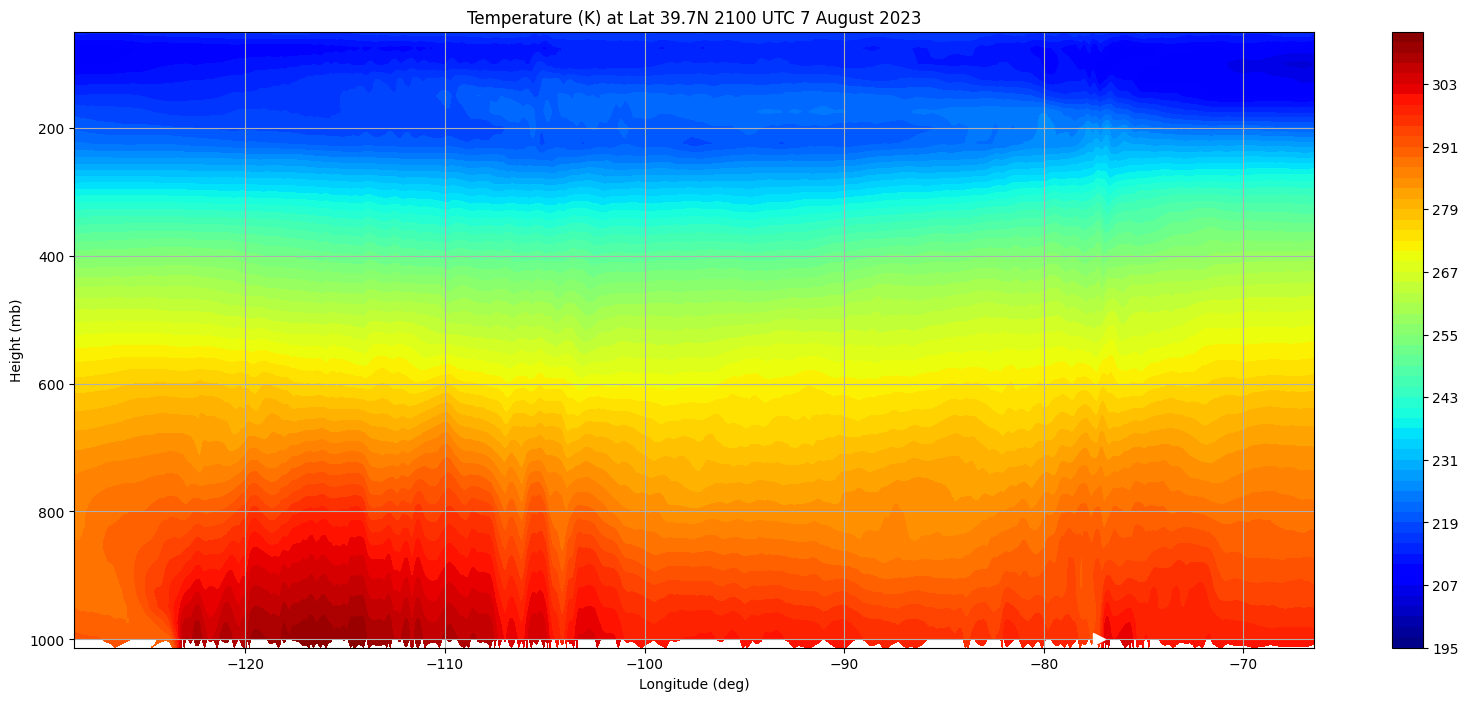

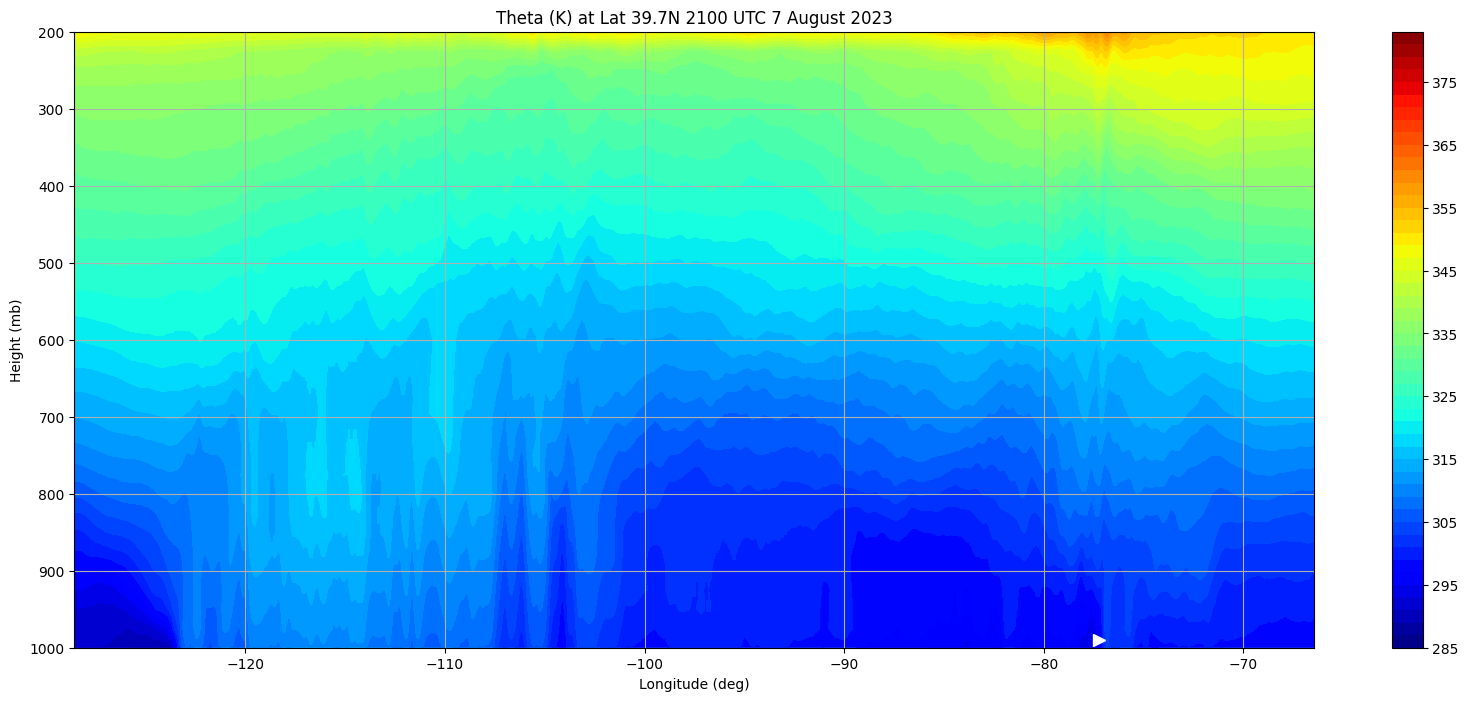

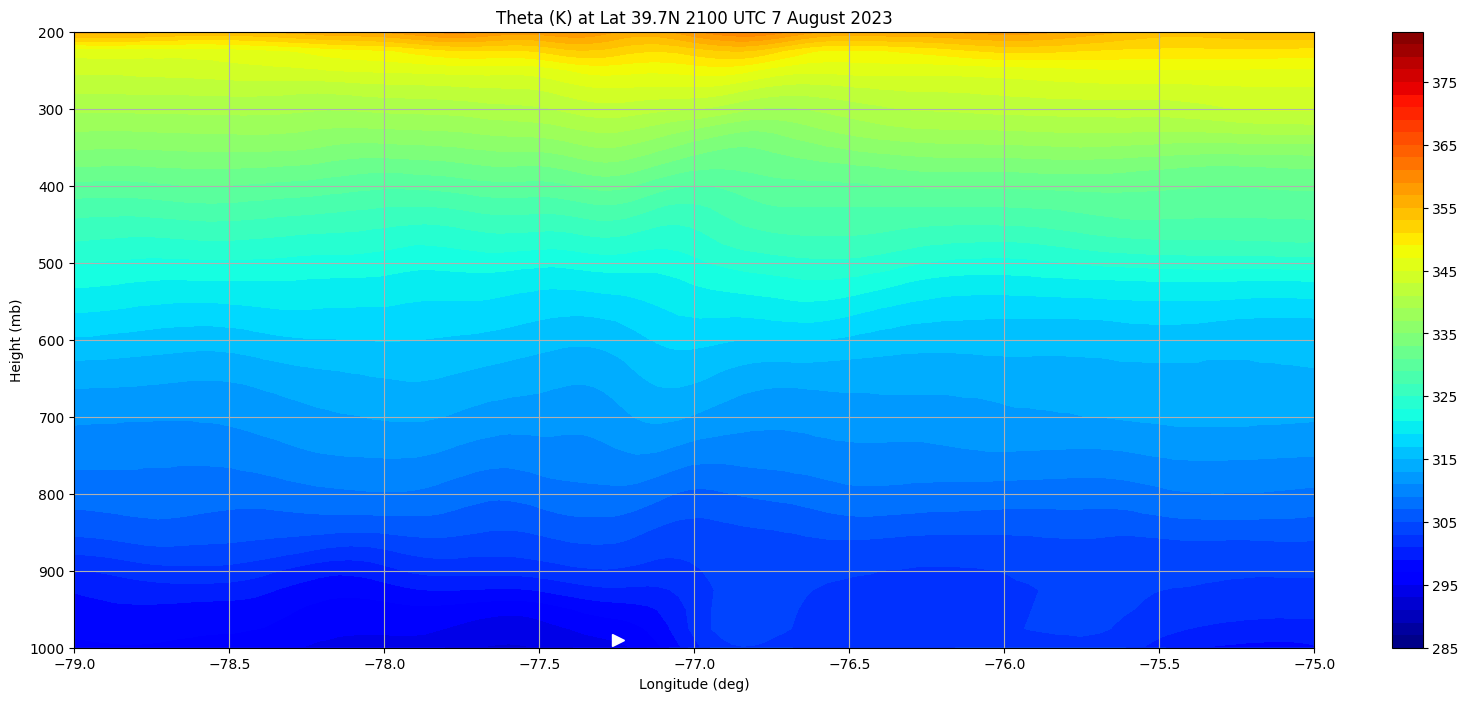

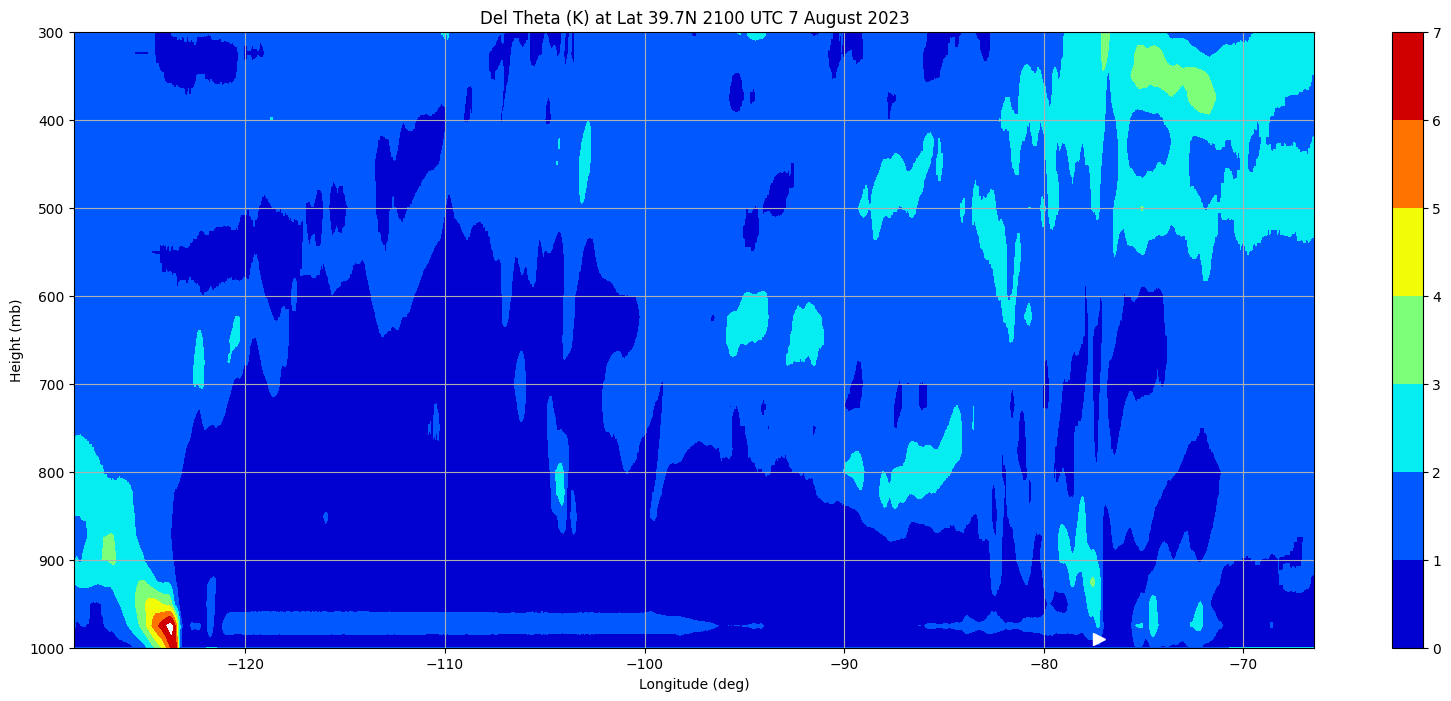

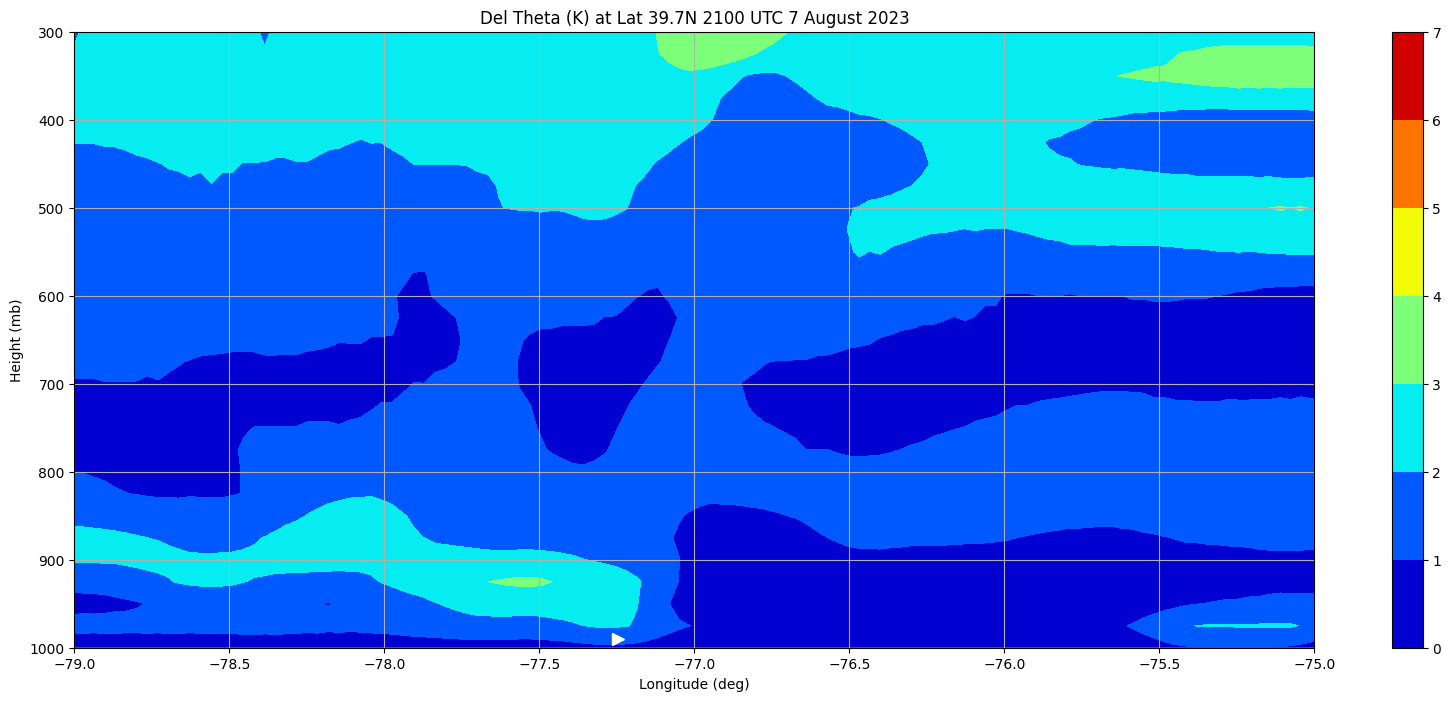

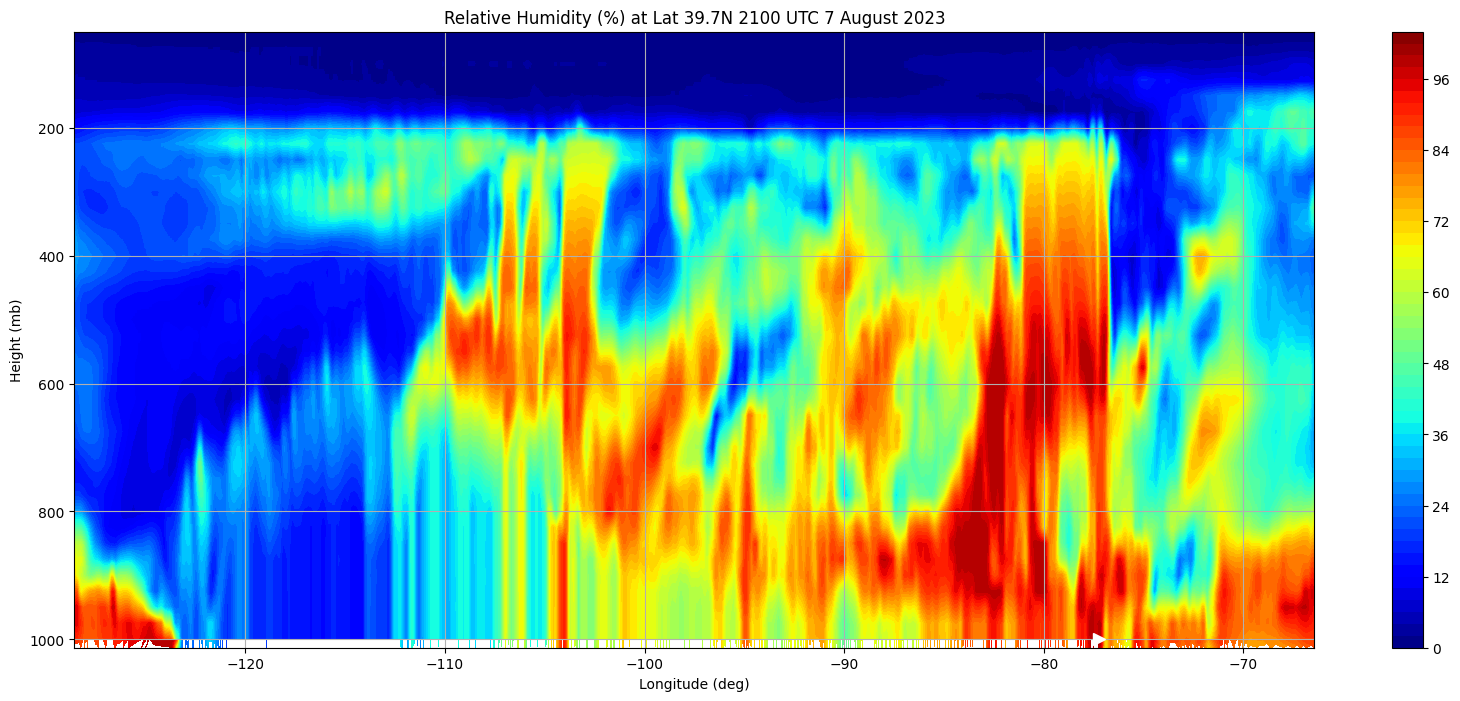

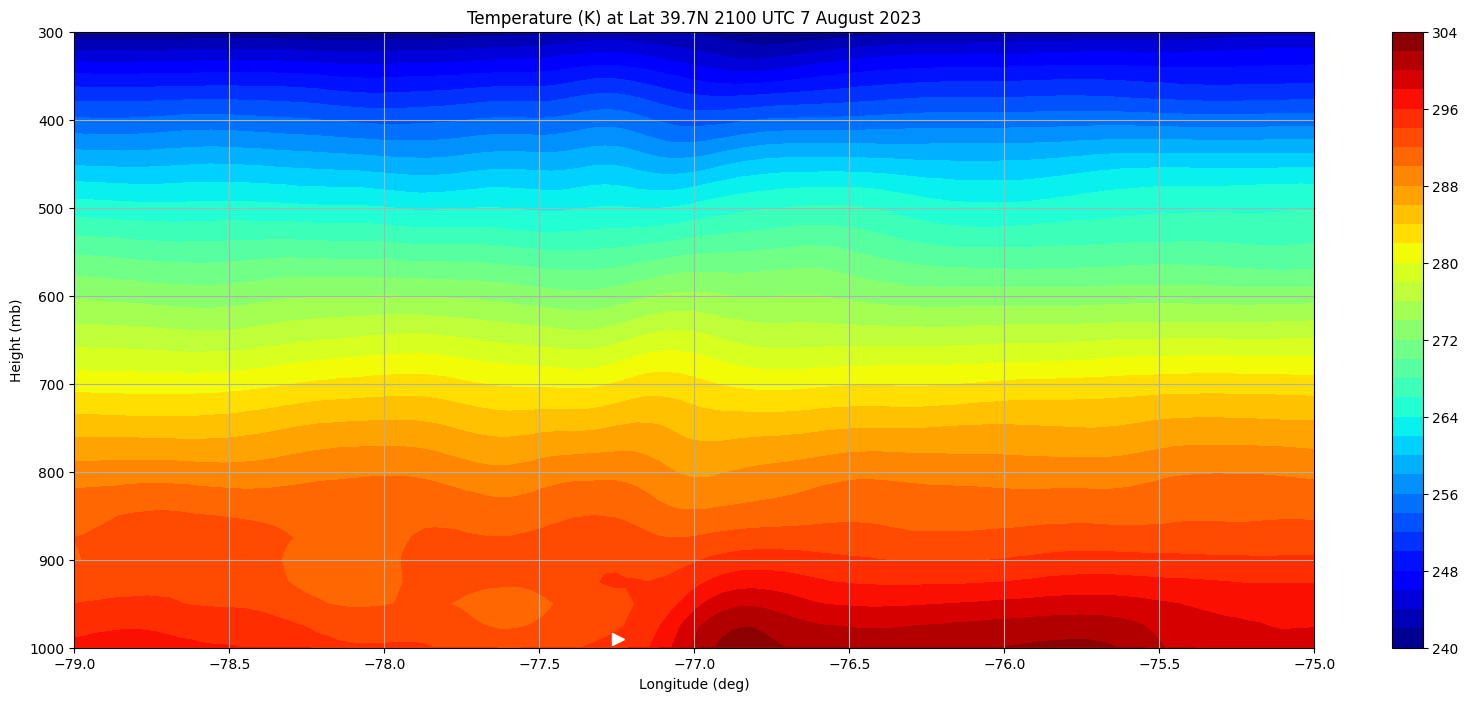

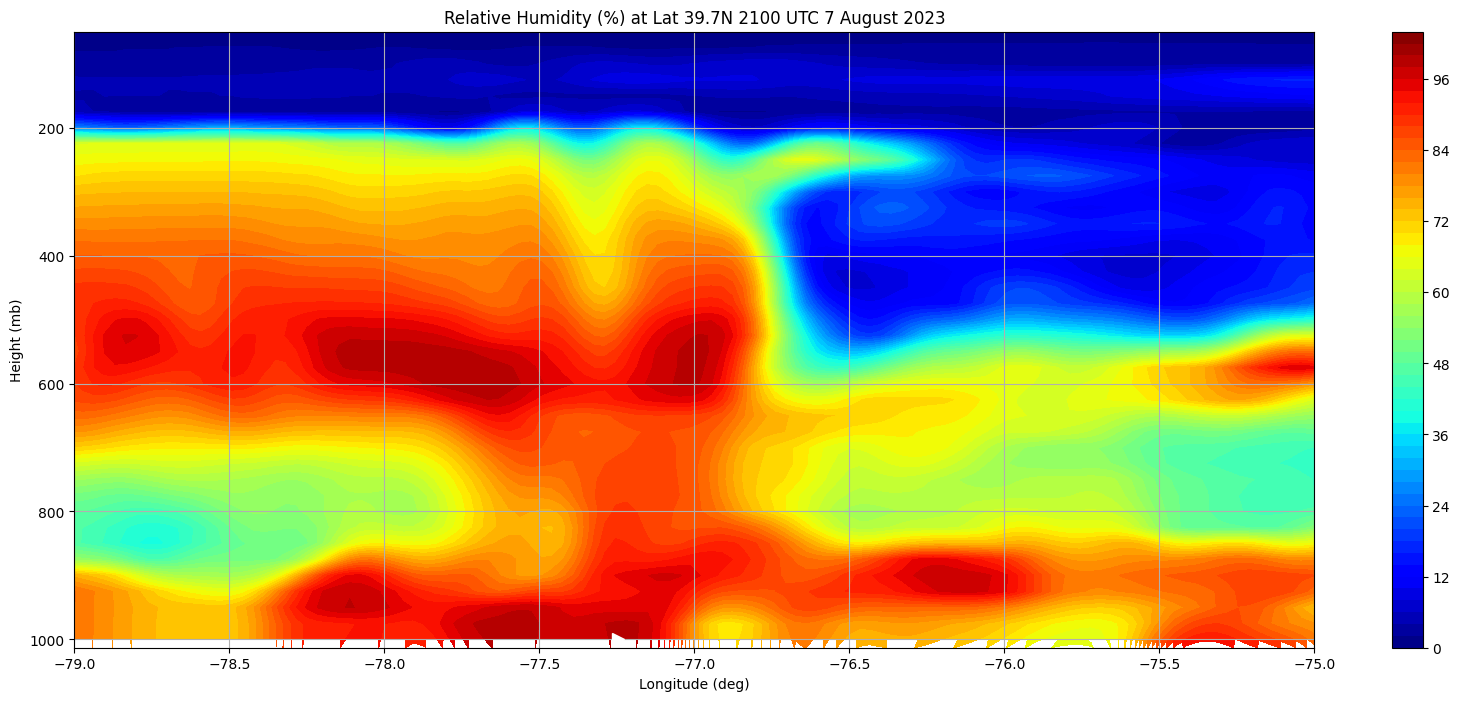

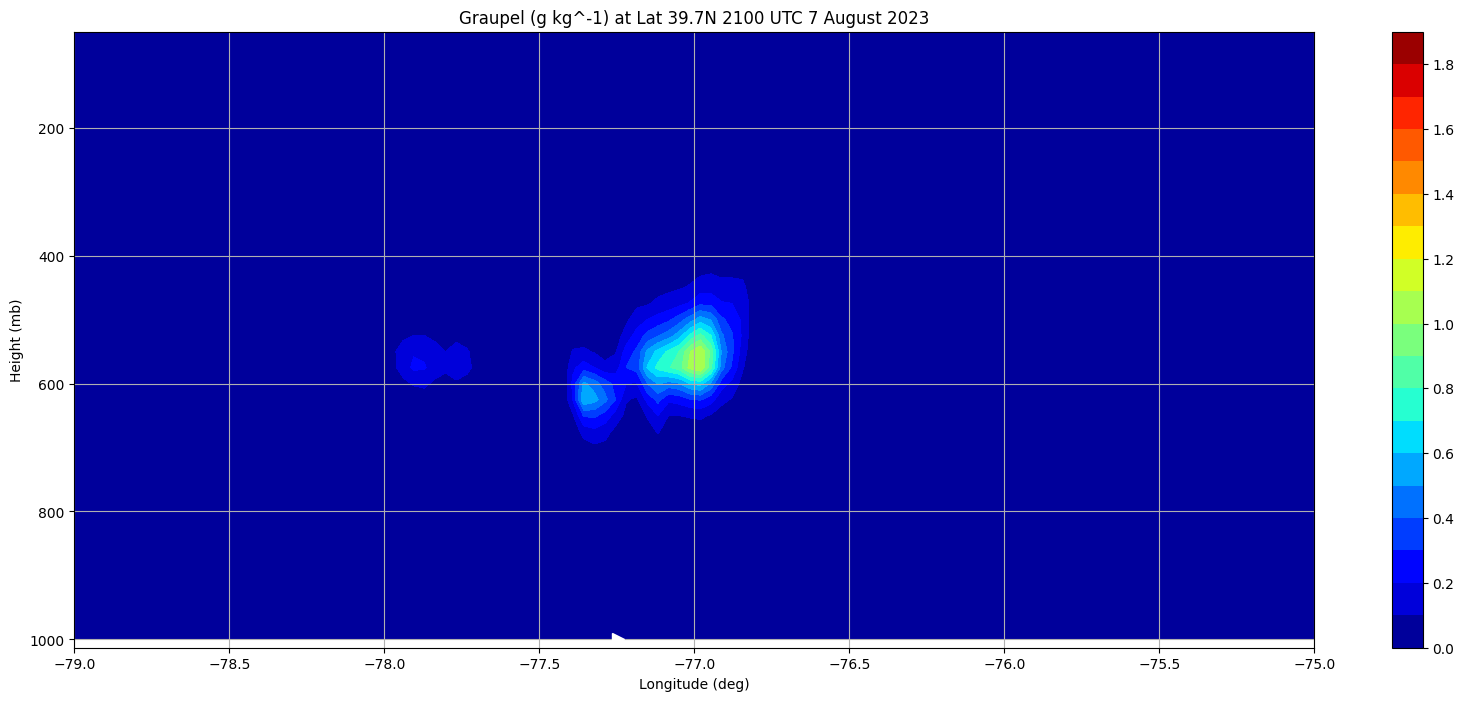

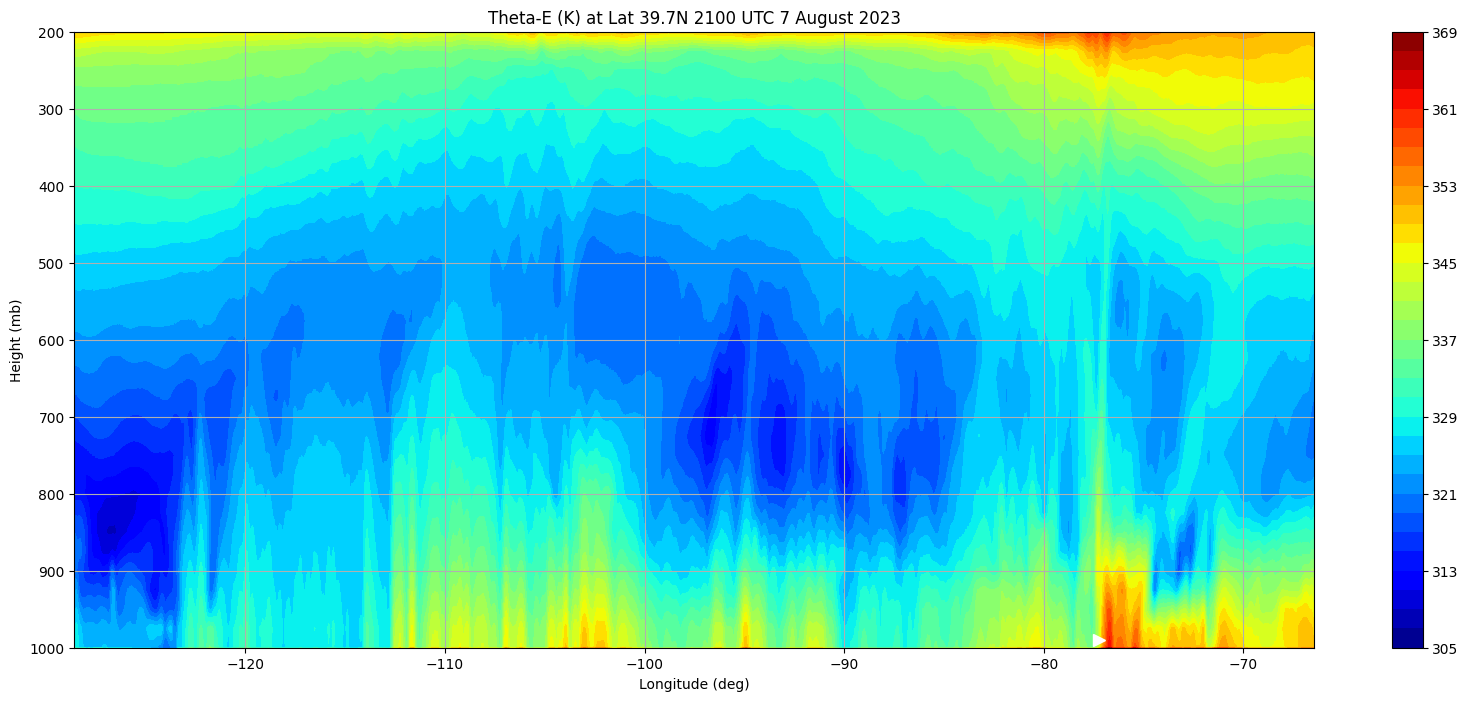

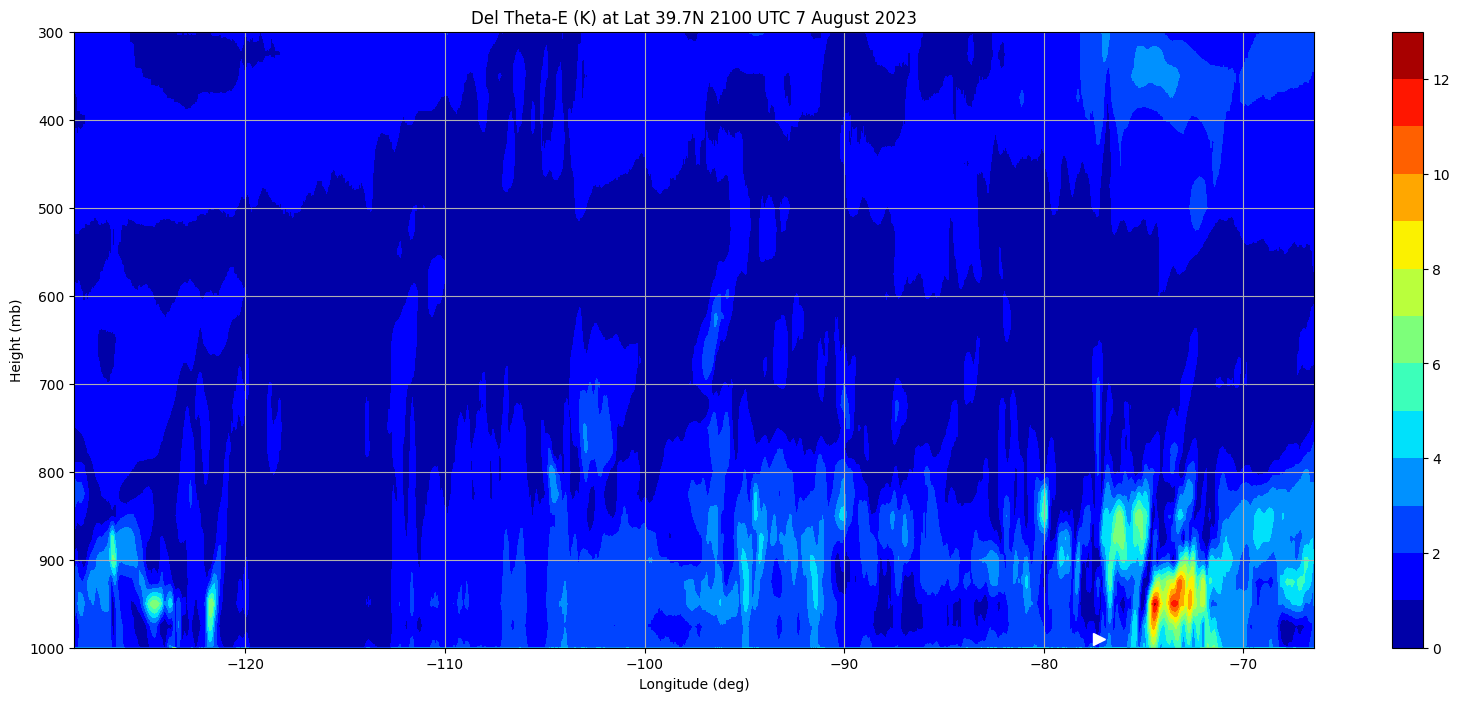

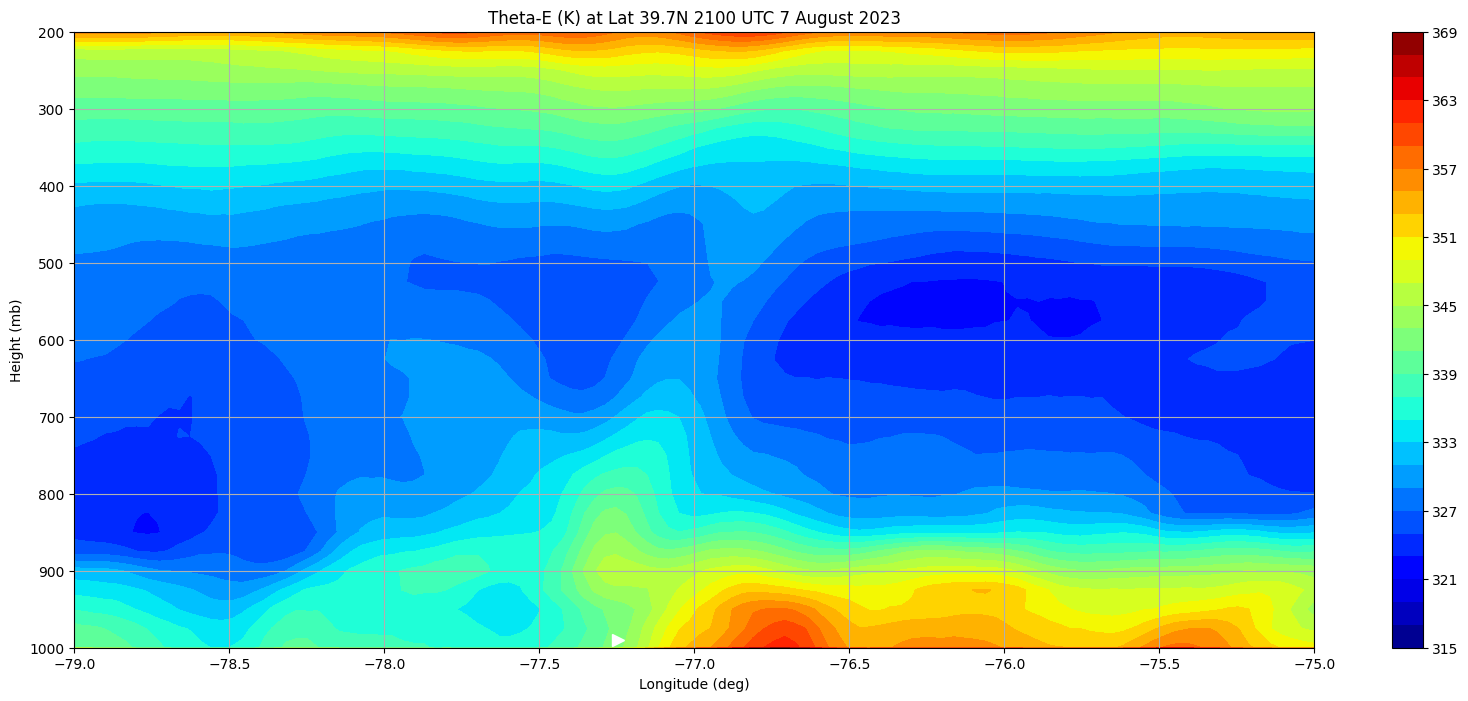

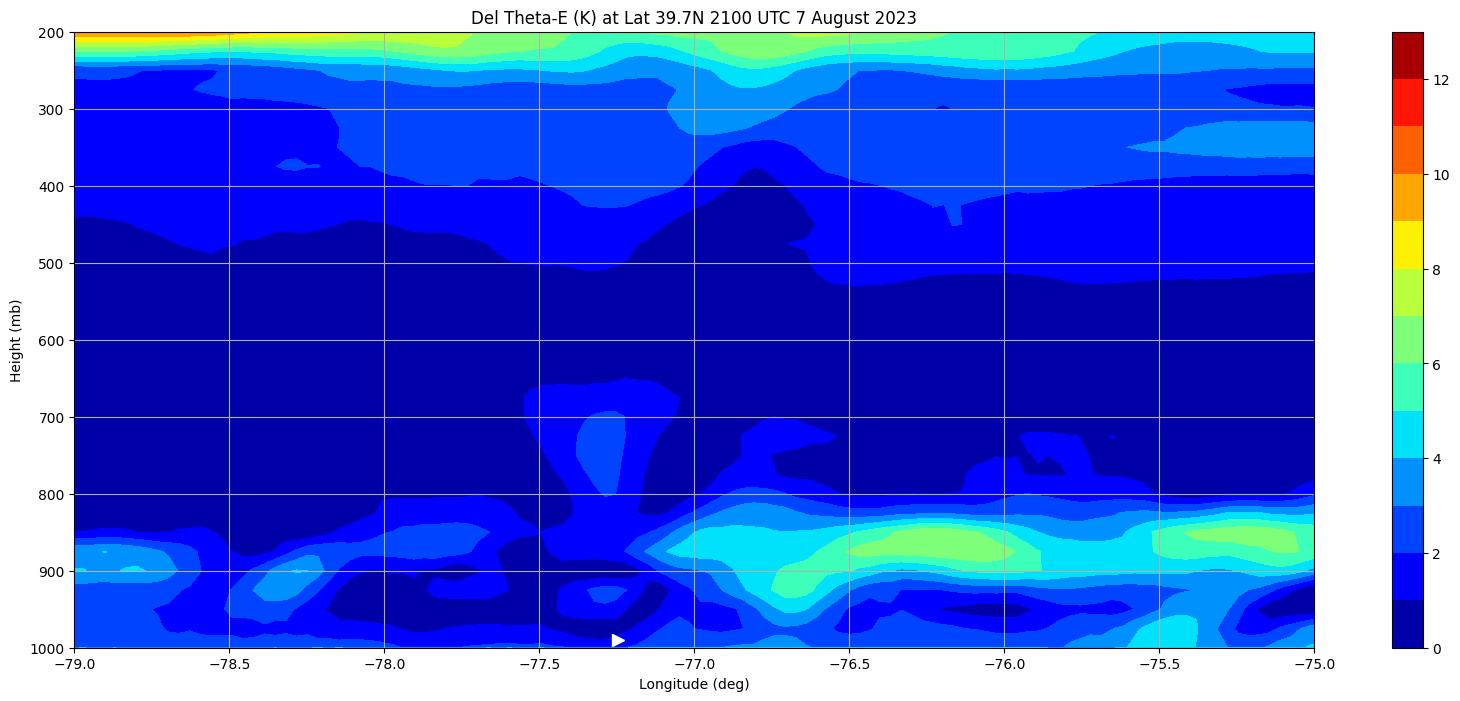

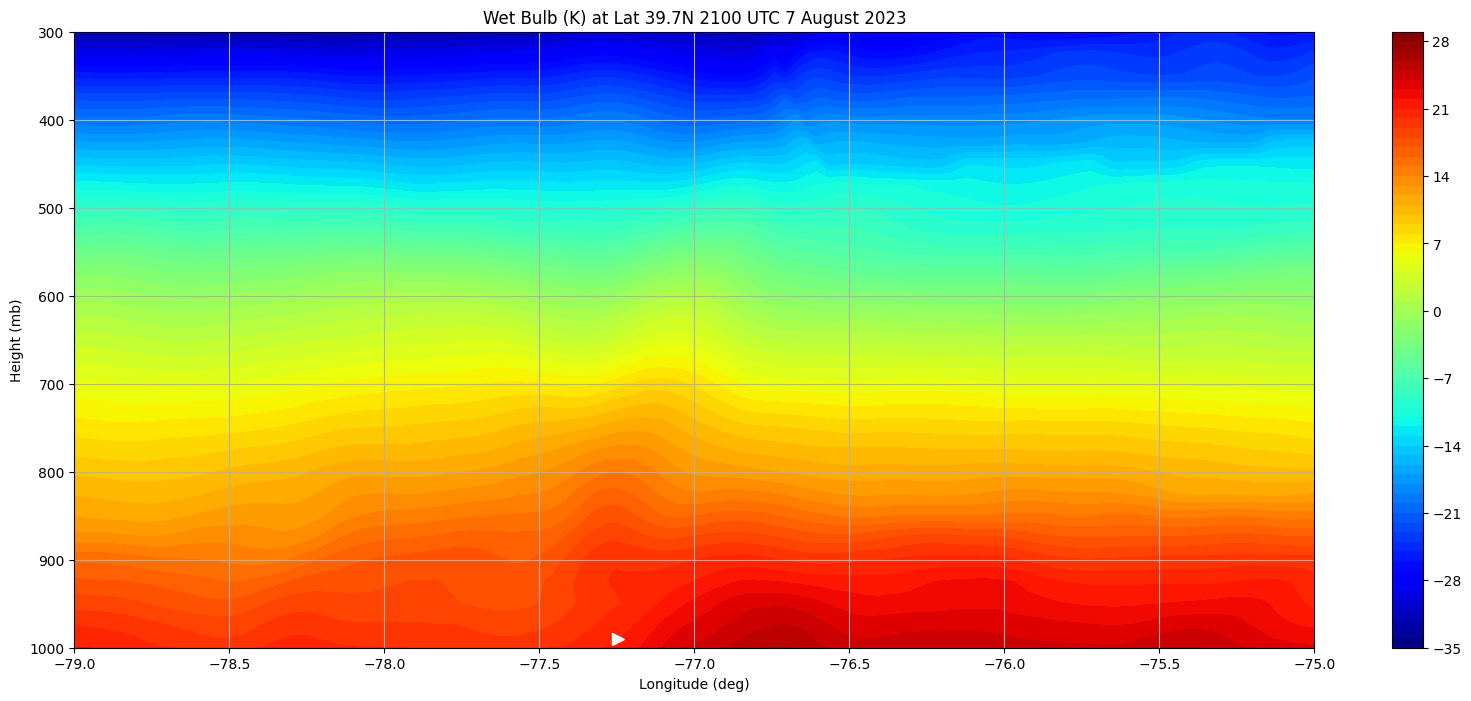

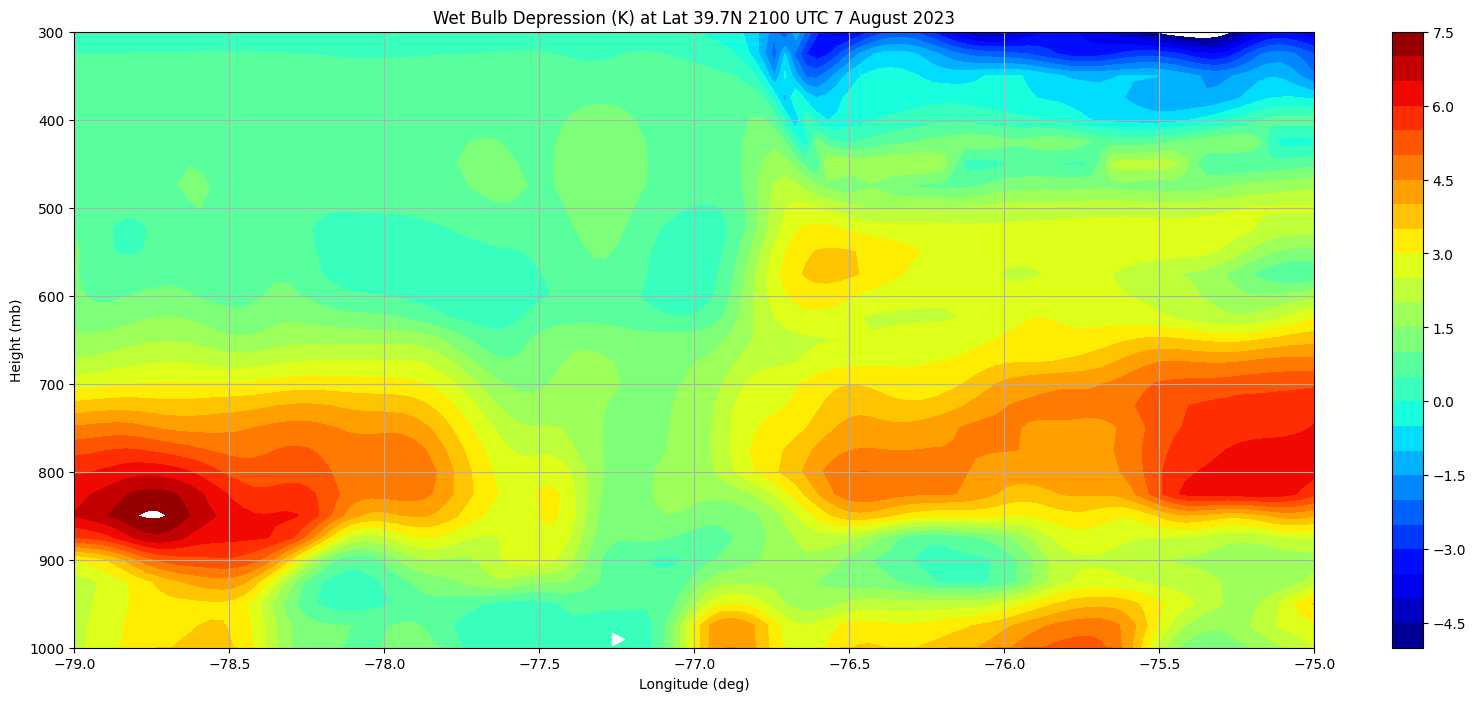

In [7]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(195,315,2)
cs = ax.contourf(newlons, levs, tp[:, idx[0], :], Tlevels, cmap='jet')
ax.plot(-77.247463, 1000, '>w', markersize=8)
cbar = plt.colorbar(cs)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("temp_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

tp_x = tp[:, idx[0], :]
print("T at lat 39.7: ", tp_x, tp_x.shape)
tp_xc = tp_x -273.15 
print(tp_xc.shape, tp_xc)
theta = tp_x*((1000/levs)**0.286)
print("Theta at lat 39.7: ", theta, theta.shape, theta.min(), theta.max())
del_theta = np.absolute(np.gradient(theta,axis=0))
print("Del Theta in K: ", del_theta, del_theta.shape, del_theta.min(), del_theta.max())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(285,385,2)
cs = ax.contourf(newlons, levs, theta, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.ylim(200, 1000)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("theta_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(285,385,2)
cs = ax.contourf(newlons, levs, theta, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(200, 1000)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("theta_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(0,8,1)
cs = ax.contourf(newlons, levs, del_theta, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.ylim(300, 1000)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Del Theta (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("del_theta_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(0,8,1)
cs = ax.contourf(newlons, levs, del_theta, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(300, 1000)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Del Theta (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("del_theta_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
Rlevels = np.arange(0,105,2)
cs = ax.contourf(newlons, levs, rhp[:, idx[0], :], Rlevels, cmap='jet')
ax.plot(-77.247463, 1000, '>w', markersize=8)
cbar = plt.colorbar(cs)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Relative Humidity (%) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("rh_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

rhp_x = rhp[:, idx[0], :]
print("RH at lat 39.7: ", rhp_x, rhp_x.shape)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
Tlevels = np.arange(240,305,2)
cs = ax.contourf(newlons, levs, tp[:, idx[0], :], Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(300, 1000)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("temp_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
Rlevels = np.arange(0,105,2)
cs = ax.contourf(newlons, levs, rhp[:, idx[0], :], Rlevels, cmap='jet')
ax.plot(-77.247463, 1000, '>w', markersize=8)
plt.xlim(-79.0, -75.0)
cbar = plt.colorbar(cs)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Relative Humidity (%) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("rh_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
GRlevels = np.arange(0,2.0,0.1)
cs = ax.contourf(newlons, levs, gr[:, idx[0], :], GRlevels, cmap='jet')
ax.plot(-77.247463, 1000, '>w', markersize=8)
plt.xlim(-79.0, -75.0)
cbar = plt.colorbar(cs)
ax.invert_yaxis()
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Graupel (g kg^-1) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("gr_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

te_x = (273.15 + tp_xc)*((1000/levs)**0.286)+(3 * (rhp_x * (3.884266 * 10**
         ((7.5 * tp_xc)/(237.7 + tp_xc)))/100))

print("Thetae K: ", te_x, te_x.shape, te_x.min(), te_x.max())

del_te = np.absolute(np.gradient(te_x,axis=0))
print("Del Thetae in K: ", del_te, del_te.shape, del_te.min(), del_te.max())

wbt_x = tp_xc*(np.arctan(0.151977*((rhp_x+8.313659)**0.5))) + (np.arctan(tp_xc+rhp_x)) - (np.arctan(rhp_x-1.676331))+((0.00391838*(rhp_x**1.5))*(np.arctan(0.023101*rhp_x))) - 4.686035
print("Wet Bulb C: ", wbt_x, wbt_x.shape, wbt_x.min(), wbt_x.max())

wbtd_x = tp_xc - wbt_x
print("Wet Bulb Dep C: ", wbtd_x, wbtd_x.shape, wbtd_x.min(), wbtd_x.max())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(305,370,2)
cs = ax.contourf(newlons, levs, te_x, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.ylim(200, 1000)
ax.invert_yaxis()   
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("theta_e_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(0,14,1)
cs = ax.contourf(newlons, levs, del_te, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.ylim(300, 1000)
ax.invert_yaxis()        
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Del Theta-E (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("del_theta_e_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(315,370,2)
cs = ax.contourf(newlons, levs, te_x, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(200, 1000)
ax.invert_yaxis()        
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("theta_e_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(0,14,1)
cs = ax.contourf(newlons, levs, del_te, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(200, 1000)
ax.invert_yaxis()    
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Del Theta-E (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("del_theta_e_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(-35,30,1)
cs = ax.contourf(newlons, levs, wbt_x, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(300, 1000)
ax.invert_yaxis()        
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Wet Bulb (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("wbt_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlons, levs = np.meshgrid(lons[idx[0], :], lev)
print("Pressure levels: ", levs, levs.shape)

Tlevels = np.arange(-5,8,0.5)
cs = ax.contourf(newlons, levs, wbtd_x, Tlevels, cmap='jet')
ax.plot(-77.247463, 990, '>w', markersize=8)
cbar = plt.colorbar(cs)
plt.xlim(-79.0, -75.0)
plt.ylim(300, 1000)
ax.invert_yaxis()        
plt.xlabel("Longitude (deg)")
plt.ylabel("Height (mb)")
plt.title("Wet Bulb Depression (K) at Lat 39.7N 2100 UTC 7 August 2023")
plt.savefig("wbtd_md_2100.png",dpi=250,bbox_inches='tight')
plt.grid(True)

In [12]:
tp_975 = tp[37, :, :]
print("T at 975 mb: ", tp_975, tp_975.shape)
lats, lons = temp_500.latlons()
tp_975_c = tp_975 - 273.15 
print(tp_975_c.shape, tp_975_c)
tp_850 = tp[32, :, :]
print("T at 850 mb: ", tp_850, tp_850.shape)
tp_850_c = tp_850 - 273.15
print("T (C) at 850 mb: ", tp_850_c, tp_850_c.shape)
tp_650 = tp[24, :, :]
print("T at 650 mb: ", tp_650, tp_650.shape)
tp_650_c = tp_650 - 273.15
print("T (C) at 650 mb: ", tp_650_c, tp_650_c.shape)
dp_850 = dp[32, :, :]
print("TD at 850 mb: ", dp_850, dp_850.shape)
rhp_850 = rhp[32, :, :]
print("RH at 850 mb: ", rhp_850, rhp_850.shape)
dp_650 = dp[24, :, :]
print("TD at 650 mb: ", dp_650, dp_650.shape)
rhp_650 = rhp[24, :, :]
print("RH at 650 mb: ", rhp_650, rhp_650.shape)
gh_850 = gh[32, :, :]
print("Z at 850 mb: ", gh_850, gh_850.shape)
gh_650 = gh[24, :, :]
print("Z at 650 mb: ", gh_650, gh_650.shape)
lats, lons = temp_500.latlons()
tp_975_c = tp_975 - 273.15 
print(tp_975_c.shape, tp_975_c)
theta_975 = tp_975*((1000/975)**0.286)
print("Theta at 975 mb: ", theta_975, theta_975.shape, theta_975.min(), theta_975.max())
rhp_975 = rhp[37, :, :]
print("RH at 975 mb: ", rhp_975, rhp_975.shape)
te_975 = (273.15 + tp_975_c)*((1000/975)**0.286)+(3 * (rhp_975 * (3.884266 * 10**
         ((7.5 * tp_975_c)/(237.7 + tp_975_c)))/100))

print("Thetae K: ", te_975, te_975.shape, te_975.min(), te_975.max())

tp_575 = tp[21, :, :]
print("T at 575 mb: ", tp_575, tp_575.shape)
lats, lons = temp_500.latlons()
tp_575_c = tp_575 - 273.15 
print(tp_575_c.shape, tp_575_c)
theta_575 = tp_575*((1000/575)**0.286)
print("Theta at 575 mb: ", theta_575, theta_575.shape, theta_575.min(), theta_575.max())
rhp_575 = rhp[21, :, :]
print("RH at 575 mb: ", rhp_575, rhp_575.shape)
te_575 = (273.15 + tp_575_c)*((1000/575)**0.286)+(3 * (rhp_575 * (3.884266 * 10**
         ((7.5 * tp_575_c)/(237.7 + tp_575_c)))/100))

print("575 mb Thetae K: ", te_575, te_575.shape, te_575.min(), te_575.max())

ted = te_975 - te_575
print("Thetae Diff K: ", ted, ted.shape, ted.min(), ted.max())

wbt_850 = tp_850_c*(np.arctan(0.151977*((rhp_850+8.313659)**0.5))) + (np.arctan(tp_850_c+rhp_850)) - (np.arctan(rhp_850-1.676331))+((0.00391838*(rhp_850**1.5))*(np.arctan(0.023101*rhp_850))) - 4.686035
print("850 mb Wet Bulb (C): ", wbt_850, wbt_850.shape, wbt_850.min(), wbt_850.max())

wbtd_850 = tp_850_c - wbt_850
print("850 mb Wet Bulb Dep (C): ", wbtd_850, wbtd_850.shape, wbtd_850.min(), wbtd_850.max())

wbt_650 = tp_650_c*(np.arctan(0.151977*((rhp_650+8.313659)**0.5))) + (np.arctan(tp_650_c+rhp_650)) - (np.arctan(rhp_650-1.676331))+((0.00391838*(rhp_650**1.5))*(np.arctan(0.023101*rhp_650))) - 4.686035
print("650 mb Wet Bulb (C): ", wbt_650, wbt_650.shape, wbt_650.min(), wbt_650.max())

wbtd_650 = tp_650_c - wbt_650
print("650 mb Wet Bulb Dep (C): ", wbtd_650, wbtd_650.shape, wbtd_650.min(), wbtd_650.max())

wbt_975 = tp_975_c*(np.arctan(0.151977*((rhp_975+8.313659)**0.5))) + (np.arctan(tp_975_c+rhp_975)) - (np.arctan(rhp_975-1.676331))+((0.00391838*(rhp_975**1.5))*(np.arctan(0.023101*rhp_975))) - 4.686035
print("975 mb Wet Bulb (C): ", wbt_975, wbt_975.shape, wbt_975.min(), wbt_975.max())

wbtd_975 = tp_975_c - wbt_975
print("975 mb Wet Bulb Dep (C): ", wbtd_975, wbtd_975.shape, wbtd_975.min(), wbtd_975.max())

gamma_wb = (wbt_850 - wbt_650)/(gh_650 - gh_850)
print("Wet Bulb Gamma (C/km) = ", gamma_wb, gamma_wb.shape, gamma_wb.min(), gamma_wb.max())

T at 975 mb:  [[292.853302 292.853302 292.853302 ... 299.478302 299.478302 299.478302]
 [292.853302 292.853302 292.853302 ... 299.478302 299.478302 299.478302]
 [292.853302 292.853302 292.853302 ... 299.478302 299.478302 299.478302]
 ...
 [288.353302 288.353302 288.353302 ... 287.228302 287.290802 287.290802]
 [288.415802 288.353302 288.353302 ... 287.228302 287.290802 287.290802]
 [288.415802 288.353302 288.353302 ... 287.228302 287.228302 287.290802]] (1059, 1799)
(1059, 1799) [[19.703302 19.703302 19.703302 ... 26.328302 26.328302 26.328302]
 [19.703302 19.703302 19.703302 ... 26.328302 26.328302 26.328302]
 [19.703302 19.703302 19.703302 ... 26.328302 26.328302 26.328302]
 ...
 [15.203302 15.203302 15.203302 ... 14.078302 14.140802 14.140802]
 [15.265802 15.203302 15.203302 ... 14.078302 14.140802 14.140802]
 [15.265802 15.203302 15.203302 ... 14.078302 14.078302 14.140802]]
T at 850 mb:  [[293.8230896 293.7605896 293.7605896 ... 294.8855896 294.8855896
  294.8855896]
 [293.7605896

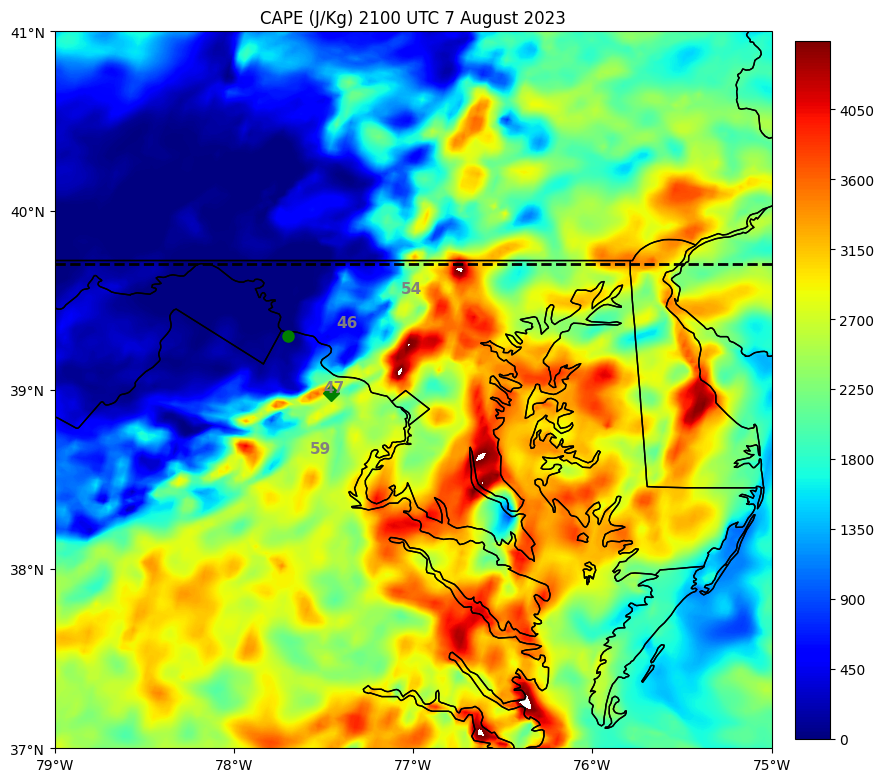

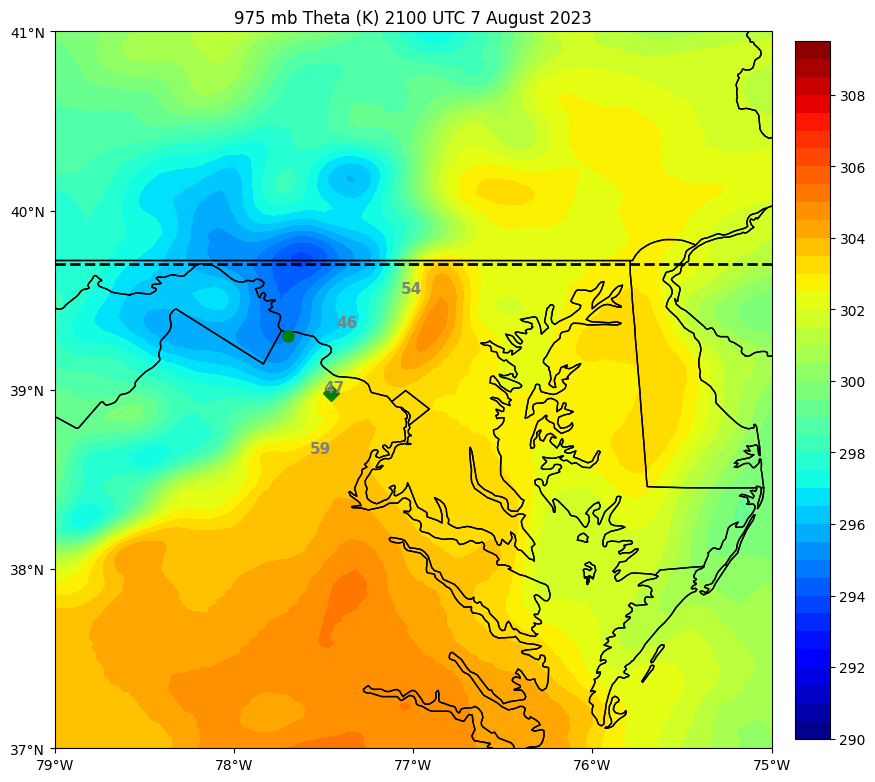

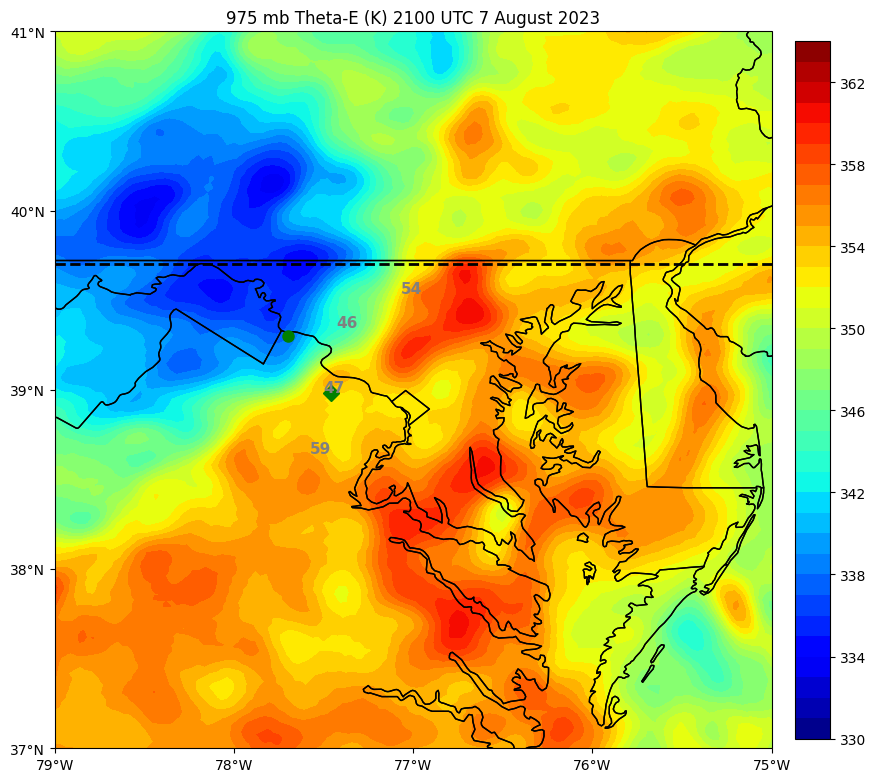

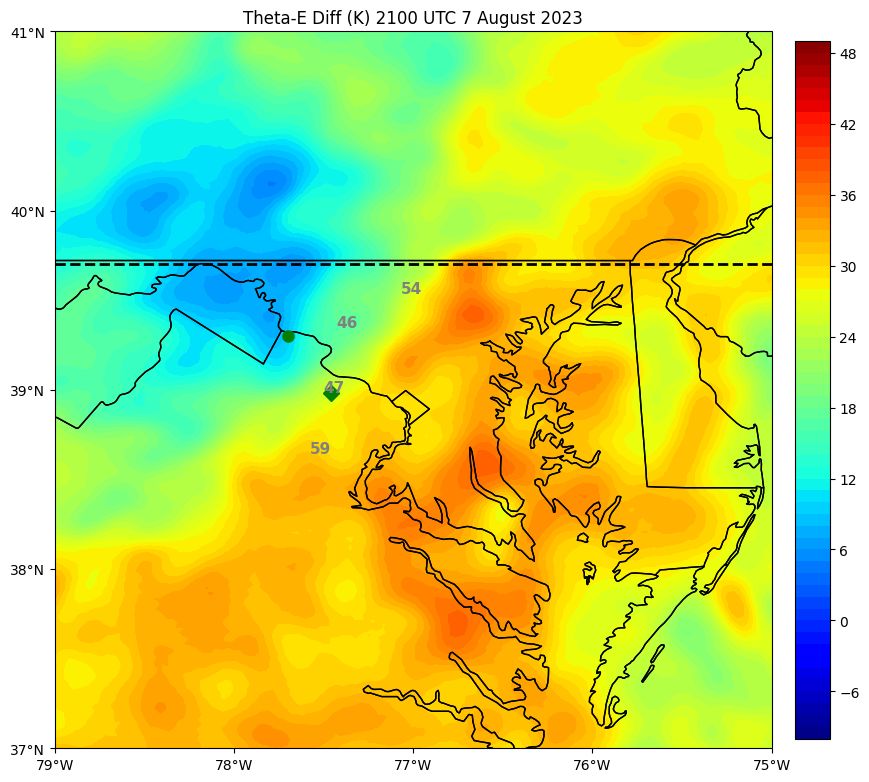

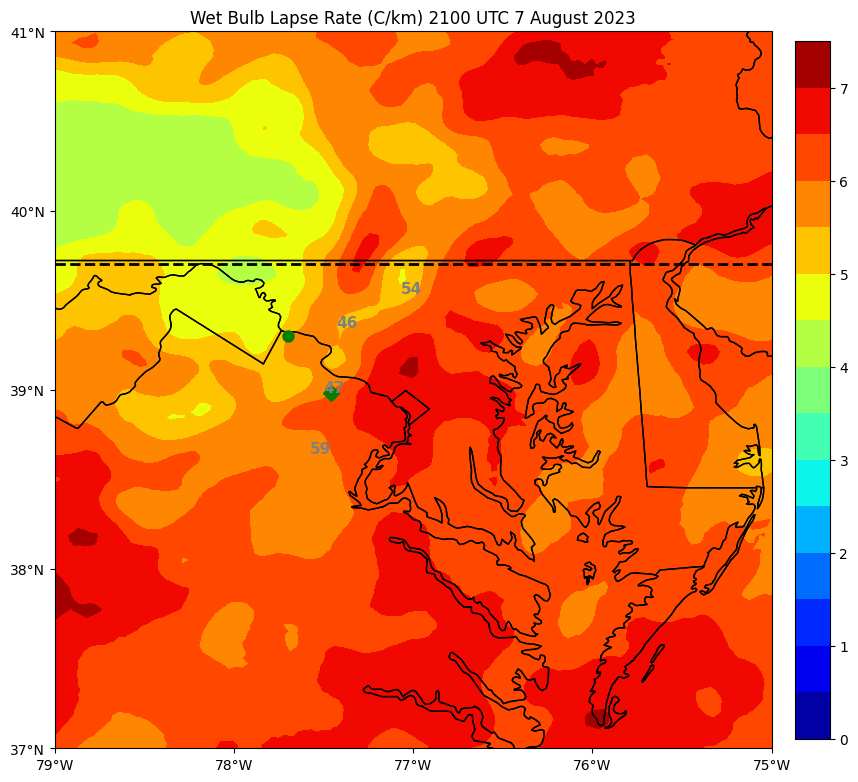

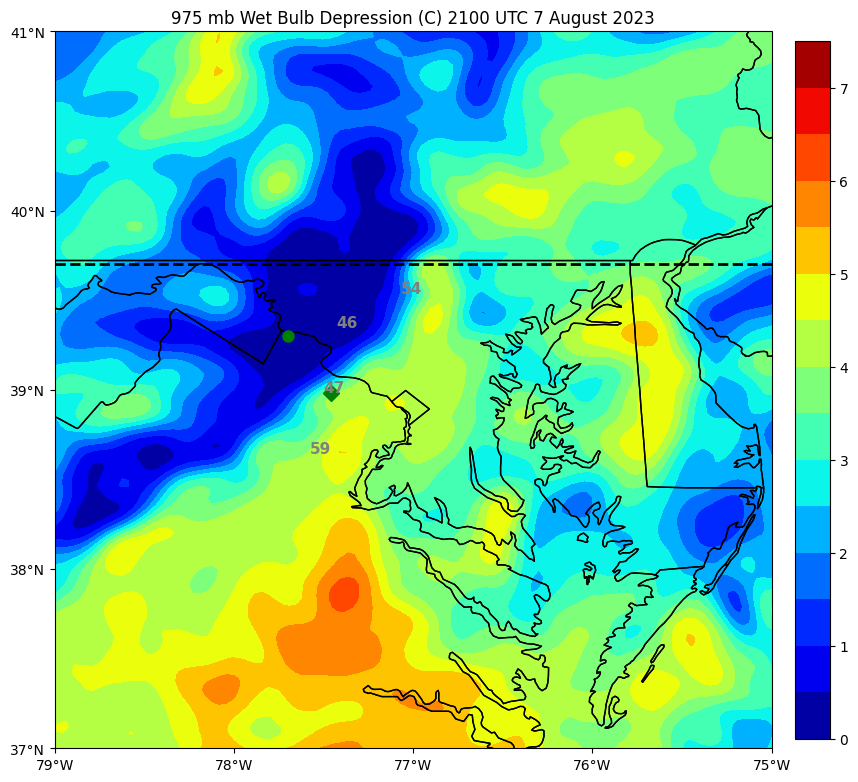

In [14]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('CAPE (J/Kg) 2100 UTC 7 August 2023')

Clevels = np.arange(0,4500,10)
cth = ax.contourf(lons,lats,cape,Clevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("cape_map_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('975 mb Theta (K) 2100 UTC 7 August 2023')

Tlevels = np.arange(290,310,0.5)
cth = ax.contourf(lons,lats,theta_975,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("theta_map_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('975 mb Theta-E (K) 2100 UTC 7 August 2023')

Tlevels = np.arange(330,365,1)
cth = ax.contourf(lons,lats,te_975,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("theta_e_map_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('Theta-E Diff (K) 2100 UTC 7 August 2023')

Tlevels = np.arange(-10,50,1)
cth = ax.contourf(lons,lats,ted,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("theta_e_diff_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('Wet Bulb Lapse Rate (C/km) 2100 UTC 7 August 2023')

Tlevels = np.arange(0,8,0.5)
cth = ax.contourf(lons,lats,gamma_wb,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("wb_gamma_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('975 mb Wet Bulb Depression (C) 2100 UTC 7 August 2023')

Tlevels = np.arange(0,8,0.5)
cth = ax.contourf(lons,lats,wbtd_975,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("wbtd_975_2100.png",dpi=250,bbox_inches='tight')
plt.show()

Gamma =  [[5.73037519 5.70280699 5.7028856  ... 6.16322573 6.16314089 6.16314089]
 [5.70264978 5.70272838 5.67516057 ... 6.16331057 6.16322573 6.16322573]
 [5.70249258 5.70257118 5.67500412 ... 6.16339541 6.16339541 6.16331057]
 ...
 [3.61215208 3.61230515 3.58420541 ... 3.66558615 3.72324305 3.7236701 ]
 [3.61205004 3.6122031  3.61235618 ... 3.72318968 3.75229039 3.752667  ]
 [3.64019684 3.61210106 3.6122031  ... 3.75218281 3.7526132  3.78177736]]
DD upper =  [[ 6.8944397  6.8944397  6.8944397 ... 14.4569397 14.4569397 14.4569397]
 [ 6.8944397  6.8319397  6.8319397 ... 14.4569397 14.4569397 14.5819397]
 [ 6.8944397  6.8319397  6.8319397 ... 14.5194397 14.5819397 14.6444397]
 ...
 [ 1.7694397  1.7069397  1.7069397 ... 14.3944397 14.2069397 14.2069397]
 [ 1.7694397  1.7694397  1.7694397 ... 14.3319397 14.1444397 14.0819397]
 [ 1.8319397  1.8319397  1.8319397 ... 14.2069397 14.1444397 13.9569397]]
DD lower =  [[20.32330322 19.88580322 19.44830322 ... 11.01080322 11.01080322
  10.94830322

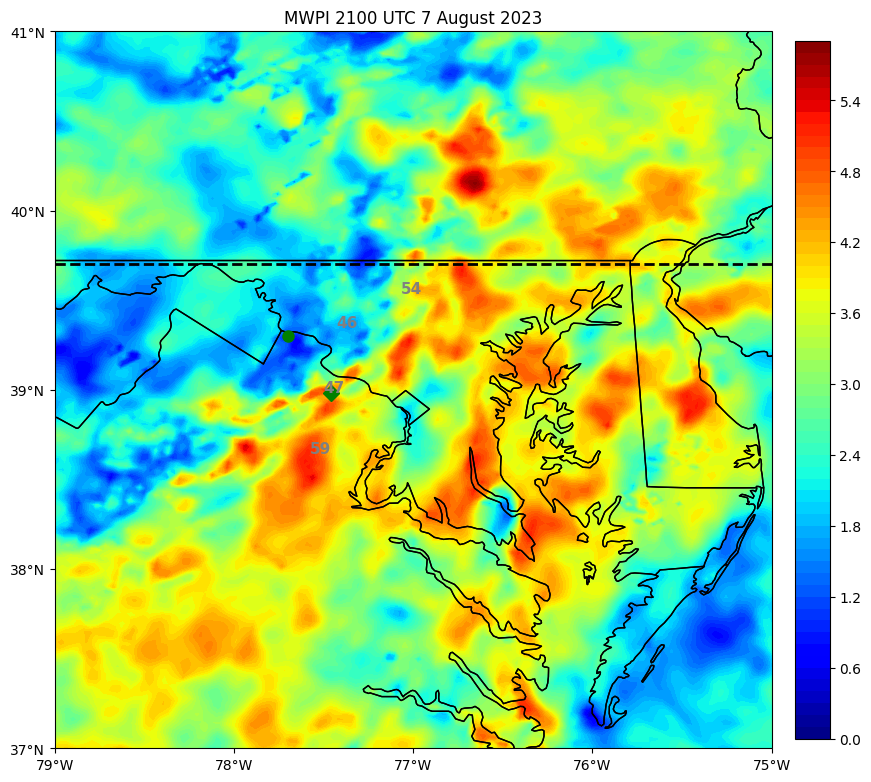

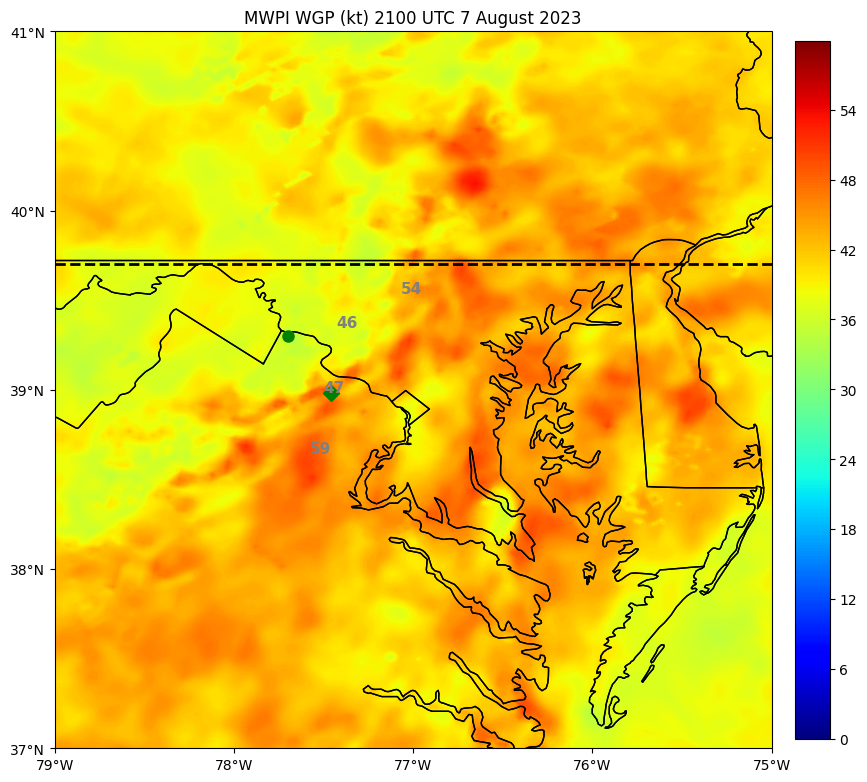

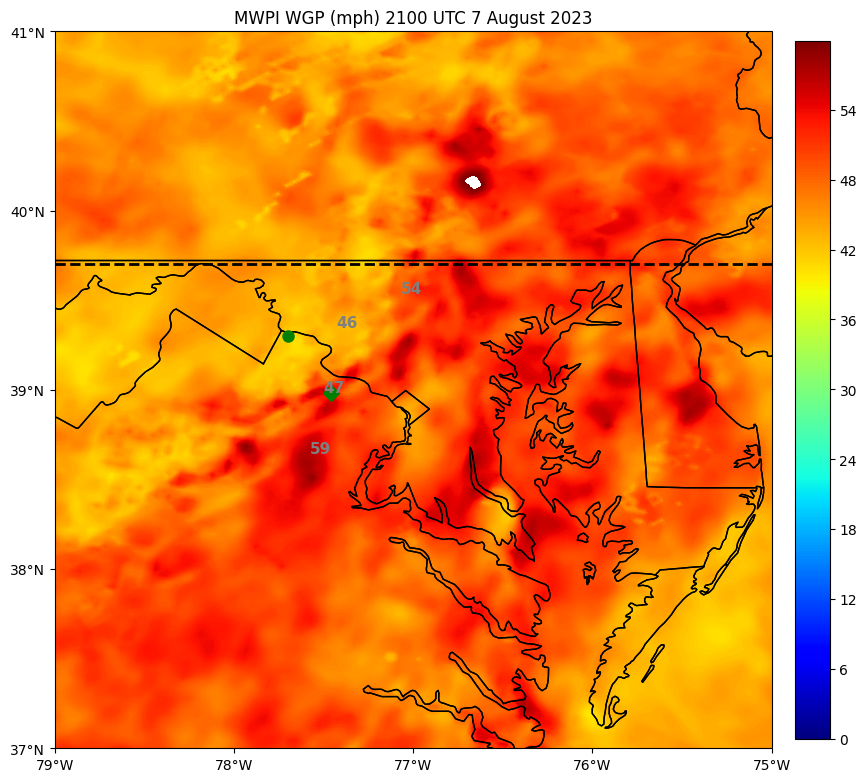

In [13]:
Z_upper = gh_650
Z_lower = gh_850
T_upper = tp_650
T_lower = tp_850
TD_upper = dp_650
TD_lower = dp_850
CAPE = cape
 
def MWPI(Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        print("Gamma = ", gamma)
        DD_upper = T_upper - TD_upper
        print("DD upper = ", DD_upper)
        DD_lower = T_lower - TD_lower
        print("DD lower = ", DD_lower)
        DDD = DD_lower - DD_upper
        print("Delta DD = ", DDD)
        MWPI = (CAPE/1000.0) + (gamma/5.0) + (DDD/5.0)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        return MWPI, WGP

mwpi, mwpi_wgp = MWPI(Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE) 
print("MWPI: ", mwpi, mwpi.shape, mwpi.min(), mwpi.max())
print("WGP: ", mwpi_wgp, mwpi_wgp.shape, mwpi_wgp.min(), mwpi_wgp.max())
mwpi_wgp_mph = mwpi_wgp * 1.151

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('MWPI 2100 UTC 7 August 2023')

Mlevels = np.arange(0,6,0.1)
cth = ax.contourf(lons,lats,mwpi,Mlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("mwpi_map_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('MWPI WGP (kt) 2100 UTC 7 August 2023')

Wlevels = np.arange(0,60,0.1)
cth = ax.contourf(lons,lats,mwpi_wgp,Wlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("mwpi_wgp_map_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-78.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-78.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))

plt.title('MWPI WGP (mph) 2100 UTC 7 August 2023')

Wlevels = np.arange(0,60,0.1)
cth = ax.contourf(lons,lats,mwpi_wgp_mph,Wlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.7, 39.3, 'og', markersize=8, transform=crs.Geodetic())
ax.plot(-77.46, 38.98, 'Dg', markersize=8, transform=crs.Geodetic())
ax.text(-77.36982, 39.41775, '46', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '54', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44412, 39.05480, '47', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.51667, 38.71667, '59', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

plt.plot([-79, -75], [39.70427305681921, 39.70427305681921], linestyle='--',
         color='black', linewidth=2, transform=crs.PlateCarree(globe=None))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cth,fraction=0.045,pad=0.03)
plt.savefig("mwpi_wgp_mph_2100.png",dpi=250,bbox_inches='tight')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0227eb63-cdc8-40ac-8a88-8d70a0cbfb46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>